In [91]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [66]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [67]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [68]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [69]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
scaled_df.set_index(crypto_names, inplace=True)

# Display sample data
print(scaled_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [70]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}


### Prepare the Data
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
scaled_df.set_index(crypto_names, inplace=True)

# Display sample data
print(scaled_df.head(5))

### Find the Best Value for k Using the Original Scaled DataFrame.
# Create a list with the number of k-values to try
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

    k     inertia
0   1  287.000000
1   2  198.571818
2   3  164.646914
3   4   90.710302
4   5   66.217780
5   6   53.576916
6   7   49.862174
7   8   37.384252
8   9   32.832187
9  10   29.443108


c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


-1

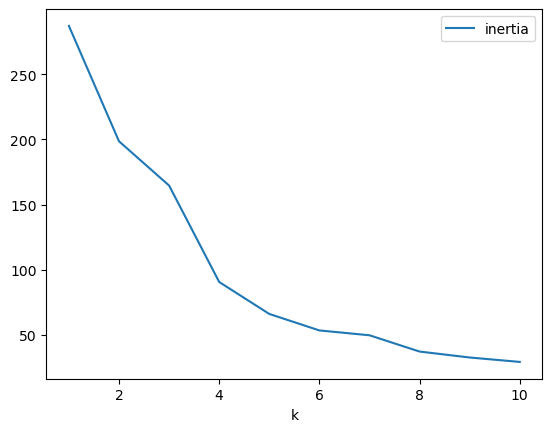

In [71]:
# Plot a line chart with all the inertia values computed with 
elbow_df.plot(x='k', y='inertia', kind='line')
# the different values of k to visually identify the optimal value for k.
4-5

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [72]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace with the best value for k
kmeans = KMeans(n_clusters=best_k)



In [73]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [74]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_values = kmeans.predict(scaled_df)

# View the resulting array of cluster values.
print(cluster_values)


[2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 0 3 1
 0 2 2 2]


In [75]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()

In [76]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df['cluster'] = cluster_values

# Display sample data
print(clustered_df.head(5))

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

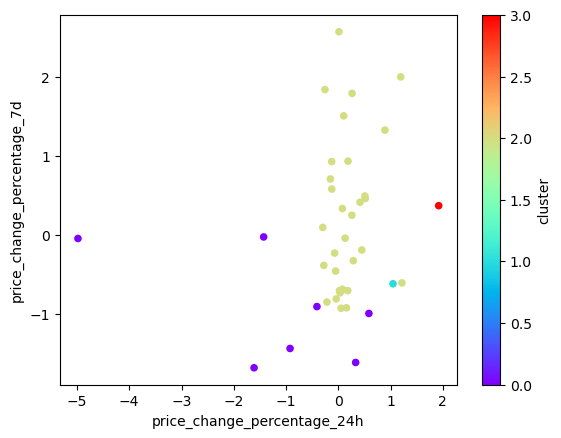

In [77]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='cluster', colormap='rainbow')


### Optimize Clusters with Principal Component Analysis.

In [78]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [79]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(pca_data, index=scaled_df.index, columns=['PCA1', 'PCA2', 'PCA3'])
print(pca_df.head(5))

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [80]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [82]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

pca_df = pd.DataFrame(pca_data, index=scaled_df.index, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
pca_df.set_index(crypto_names, inplace=True)

# Display sample data
print(pca_df.head())

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [84]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

    k     inertia
0   1  256.874086
1   2  182.339530
2   3  115.918077
3   4   49.665497
4   5   38.072792
5   6   31.534841
6   7   29.761061
7   8   17.566462
8   9   14.123553
9  10   12.902116


c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='k'>

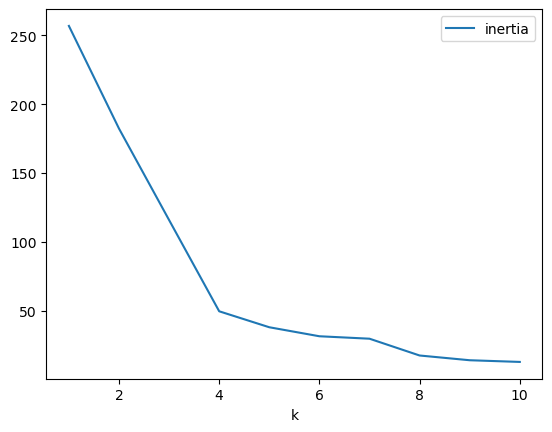

In [85]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x='k', y='inertia', kind='line')


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
4   

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  no its the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [86]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4)

In [87]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

c:\Users\jakem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [88]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print(cluster_values)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [89]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df['cluster'] = cluster_values

# Display sample data
print(clustered_pca_df)


                          PCA1      PCA2      PCA3  cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        0
ethereum             -0.458261  0.458466  0.952877        0
tether               -0.433070 -0.168126 -0.641752        3
ripple               -0.471835 -0.222660 -0.479053        3
bitcoin-cash         -1.157800  2.041209  1.859715        0
binancecoin          -0.516534  1.388377  0.804071        0
chainlink            -0.450711  0.517699  2.846143        0
cardano              -0.345600  0.729439  1.478013        0
litecoin             -0.649468  0.432165  0.600303        0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        3
crypto-com-chain     -0.248198 -1.376252 -1.462026        3
usd-coin             -0.438408 -0.175337 -0.663388        3
eos                  -0.693425 -0.473815 -0.527597        3
monero                0.060499  2.909404  1.498571        0
tron                 -0.393352 -0.108192

In [92]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
clustered_pca_df.hvplot.scatter(x='PCA1', y='PCA2', c='cluster', colormap='rainbow')


:Scatter   [PCA1]   (PCA2,cluster)

### Determine the Weights of Each Feature on each Principal Component

In [97]:
# Use the columns from the original scaled DataFrame as the index.
feature_weights = pd.DataFrame(pca.components_, index=['PCA1', 'PCA2', 'PCA3'], columns=scaled_df.columns)
print(feature_weights)

      price_change_percentage_24h  price_change_percentage_7d  \
PCA1                    -0.416728                   -0.102432   
PCA2                     0.358162                    0.227432   
PCA3                    -0.218795                    0.787670   

      price_change_percentage_14d  price_change_percentage_30d  \
PCA1                    -0.009162                     0.191523   
PCA2                     0.540415                     0.562182   
PCA3                     0.349534                    -0.181744   

      price_change_percentage_60d  price_change_percentage_200d  \
PCA1                     0.320365                      0.594468   
PCA2                     0.434040                      0.027735   
PCA3                    -0.361377                      0.039733   

      price_change_percentage_1y  
PCA1                    0.568379  
PCA2                   -0.150789  
PCA3                    0.210541  


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    

In [ ]:
PCA1 strong + price change 24      negative market cap 
PCA2   ""     market cap            negative price change 24
PCA3   ''     price change 1h           ""    Market cap
